In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import example_Ising_loader as loader
import os


params = {'mathtext.fontset' : 'stix',
          'font.family'      : 'sans-serif',
          'font.sans-serif':['Helvetica'],
          'font.size'        : 9,   
          'text.usetex'      : True,
          'text.latex.preamble':r"""
                \usepackage{type1cm}
                \usepackage{amssymb}
                \usepackage{amsmath}
                \usepackage[varg]{txfonts}
                \usepackage{newtxtext}
                \usepackage{bm}
                \usepackage{helvet}
                \usepackage{sansmath}
                \sansmath
                \newcommand{\nosans}[1]{\unsansmath #1\sansmath}
                """,
        "lines.linewidth": 1.0, # default=1.5
        "axes.labelpad": 1.5, # default=4.0
        "xtick.major.pad": 2.0, # default=3.5
        "ytick.major.pad": 2.0, # default=3.5
        "xtick.bottom": True,
        "ytick.left": True}
plt.rcParams.update(params)


mc = {"red": "tomato",
      "blue": "dodgerblue",
      "green": 'mediumseagreen'}

## Load and plot

In [ ]:
K_list = loader.K_list

tmax_list = [100.0, 50.0, 20.0, 10.0, 5.0, 2.0, 1.0, 0.5, 0.2, 0.1, 0.05, 0.02, 0.01]

parent_folder = "data-main/"
Hamiltonian_name_repr = "ferromagnetic"
driving_name_repr = ""
seed_repr = 0 
N_repr = 12
tmax_repr = 0.01

folder_name = loader.get_folder_name(Hamiltonian_name_repr, driving_name_repr, seed_repr, parent_folder)

eigenenergy_series, time_series_eval, overlap_series_all = loader.load_single_data(Hamiltonian_name=Hamiltonian_name_repr,
                                                                                   driving_name=driving_name_repr,
                                                                                   seed_idx=seed_repr,
                                                                                   N=N_repr,
                                                                                   tmax=tmax_repr,
                                                                                   parent_folder=parent_folder)

df_all = loader.load_final_overlap(Hamiltonian_name_list=[Hamiltonian_name_repr],
                                   driving_name_list=[driving_name_repr],
                                   seed_list=[seed_repr],
                                   N_list=[N_repr],
                                   tmax_list=tmax_list,
                                   parent_folder=parent_folder)
df_all.drop(columns=['Hamiltonian', 'driving', 'N', 'seed'], inplace=True)

K=0: 0.0002443471566897476
K=1: 0.08899845420992174
K=2: 0.3256107778948319
K=3: 0.5402111164587418
K=4: 0.6927888413452811
K=5: 0.7954710410278398


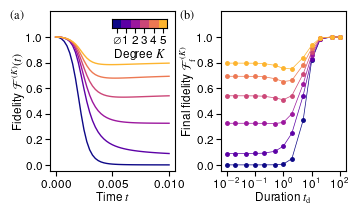

In [4]:
# ===== Prepare figure =====
aspect_ratio = 1.95/3.4
fig = plt.figure(figsize=(3.4, 3.4*aspect_ratio))
gs = mpl.gridspec.GridSpec(1, 2, width_ratios=[1, 1])
ax3 = plt.subplot(gs[0])
ax4 = plt.subplot(gs[1])

cmap_K_norm = mpl.colors.Normalize(vmin=np.min(K_list), vmax=np.max(K_list)+1)
cmap_K = mpl.cm.ScalarMappable(norm=cmap_K_norm, cmap=mpl.cm.plasma).to_rgba


# ===== (a) Plot Fidelity =====
max_least = 0
for idx in range(len(K_list)):
    K = K_list[idx]
    overlap_series = overlap_series_all[idx,:,:]
    print(f"K={K}:", overlap_series[-1,0])
    max_least = max(max_least, np.max(overlap_series[-1,0]))

    ax3.plot(time_series_eval, overlap_series[:,0], color=cmap_K(K))
    ax3.set_xlabel(r'Time \nosans{$t$}')
    ax3.set_ylabel(r'Fidelity\hspace{0.4em}\nosans{$\mathcal{F}^{(K)}(t)$}')

if Hamiltonian_name_repr == "ferromagnetic": 
    ax3.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax3.set_ylim(None, 1.2)
else:
    ax3.set_ylim([-0.05*max_least, 5*max_least])


# ===== (b) Plot the final fidelities =====
max_least = 0
for K in K_list:
    x = df_all.loc[:,'tmax'].values
    y = df_all.loc[:,f"K={K}"].values
    max_least = max(max_least, y[-1])
    ax4.plot(x, y, color=cmap_K(K), linestyle='-', marker='o', markersize=2.5, linewidth=0.5)

ax4.set_xscale('log')
ax4.set_xlabel(r'Duration \nosans{$t_\mathrm{d}$}')
ax4.set_ylabel(r'Final fidelity\hspace{0.4em}\nosans{$\mathcal{F}^{(K)}_\mathrm{f}$}')
if Hamiltonian_name_repr == "ferromagnetic":
    ax4.set_xticks([0.01, 0.1, 1, 10, 100])
    ax4.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax4.set_ylim(None, 1.2)
else:
    ax4.set_ylim([-0.05*max_least, 2*max_least])



# ===== Adjust legends etc. =====

# Adjust the space
fig.subplots_adjust(left=0.12, right=0.99, top=0.985, bottom=0.165, wspace=0.37, hspace=0.35)
# ax3.add_patch(mpl.patches.Rectangle((0.0, 0.0), width=1.0, height=1.0, color="red", fill=False, transform=fig.transFigure, clip_on=False))
fig.align_labels([ax3, ax4]) 

# Add legends
x0, y0, w0, h0 = ax3.get_position().bounds
ax3a = fig.add_axes([x0+w0 - 0.027*6.8, y0+h0 - 0.027*1.8/aspect_ratio, 0.027*6, 0.027/aspect_ratio])
ax3a.imshow([K_list], cmap=mpl.cm.plasma, norm=cmap_K_norm, aspect='equal') #, extent=[0, len(K_list), 0, 1]
ax3a.set_xticks(K_list)
ax3a.set_xticklabels([r'$\varnothing$'] + K_list[1:])
ax3a.set_yticks([])
ax3a.set_xlabel(r'Degree \nosans{$K$}')

ax3.set_title(r'\nosans{$\mathrm{(a)}$}', loc='left', x=-0.32, fontsize=9, y=1.01, verticalalignment='top', pad=0)
ax4.set_title(r'\nosans{$\mathrm{(b)}$}', loc='left', x=-0.33, fontsize=9, y=1.01, verticalalignment='top', pad=0)

# Save the figure
fig.savefig(f'{folder_name}/example_Ising_figure_detail_N={N_repr}_tmax={tmax_repr}.pdf', dpi=1200);